# Цель проекта

По заказу Министерства Культуры Российской Федерации необходимо исследовать рынок кинопроката. 

Выявить предпочтения зрителей.

Проанализировать данные о фильмах с господдержкой и оценить востребованность таких фильмов.



# Исследование данных о российском кинопрокате



## Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

### Обзор данных

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [3]:
try:
    movies_data = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_movies.csv')
    shows_data = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_shows.csv')
except:
    movies_data = pd.read_csv('/datasets/mkrf_movies.csv')
    shows_data = pd.read_csv('/datasets/mkrf_shows.csv')

In [4]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [5]:
movies_data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


Таблица с данными по фильмам состоит из 15 столбцов:
- Название тип данных object
- Номер прокатного удостовеления тип данных object (необходимо заменить на тип данных int)
- Дата начала проката тип данных object (необходимо перевести к формату даты)
- Тип тип данных object, содержит категориальные данные (необходимо проверить на наличие неявных дубликатов)
- Студия тип данных object
- Страна производитель тип данных object (необходимо проверить на наличие неявных дубликатов)
- Режисер тип данных object
- Продюсер тип данных object
- Возрастное ограничение тип данных object, содержит категориальные данные, необходимо проверить на наличие неявных дубликатов
- Возвратная господдержка тип данных float
- Невозвратная господдержка тип данных float
- Бюджет господдержки фильма тип данных float
- Источник финасирования тип данных object
- Рейтинг тип данных object(необходимо привести к формату данных float)
- Жанры тип данных object

In [6]:
shows_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.4 KB


In [7]:
shows_data.head()

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


Таблица со сведениями о показах состоит из двух столбцов:
- Номер прокатного удостоверения тип данных int
- Сумма прокатных сборов в кинотеатрах тип данных float

Видно, что типы данных в столбце с номером прокатного удостоверения двух таблиц отличаются. Необходимо исправить тип данных в таблице фильмов, чтобы провести успешное объединение двух таблиц.

Попытка сходу исправить формат данных выводит ошибку из-за наличия значения 'нет' в одной из ячеек.

Заменим значения ячеек состоящие только из букв на 0.

In [8]:
movies_data.loc[movies_data.puNumber.str.isalpha(), 'puNumber'] = 0

In [9]:
movies_data['puNumber'] = movies_data['puNumber'].astype(int)

Тип данных для значения номера прокатного удостоверения успешно изменен.

Проведем слияние двух таблиц, таким образом, чтобы в итоговой таблице сохранились все записи из таблицы фильмов.

In [10]:
total_data = movies_data.merge(shows_data, on='puNumber', how='outer')

In [11]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int32  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Таблицы успешно объединены.

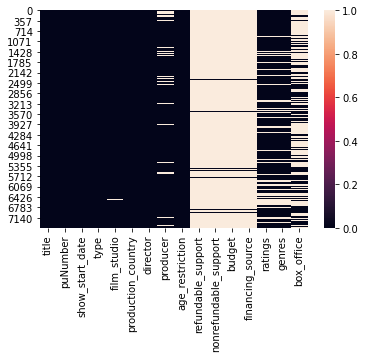

In [12]:
sns.heatmap(total_data.isna());

In [13]:
pd.DataFrame(total_data.isna().mean()).style.background_gradient('coolwarm')

,0
title,0.000000
puNumber,0.000000
show_start_date,0.000000
type,0.000000
film_studio,0.002404
production_country,0.000267
director,0.001202
producer,0.075875
age_restriction,0.000000
refundable_support,0.955651


В данных имеются пропуски.
- количество пропусков в столбцах film_studio, production_country, director незначительно их можно отбростить
- количество пропусков в столбце producer составляет более 7 %. Пропуски следует заменить на значение unknown, чтобы не терять данные.
- количество пропусков в столбцах refundable_support, nonrefundable_support, budget. financing_source составляет более 95%, заполнять эти пропуски не стоит. Логично, что господдержку получают далеко не все фильмы выходящие в прокат. В данном случае пропущенные значения можно заменить на 0.
- количество пропусков в столбце ratings составляет 12.9%. Этот столбец играет ключевую роль в исследовании. На этапе предобработки можно попробовать посмотреть зависимость рейтинга от различных категорий. Но на первый взгляд трогать этот столбец не стоит.
- количество пропусков в столбце genres составляет 13%. Значения этого столбца можно заменить на unknown.
- количество пропусков в столбце box_office составляет 57%. Для большей части данных нет сведений о выручке проката. Пропущенные значения можно заменить на 0.

In [14]:
nas_to_drop = ['film_studio', 'production_country', 'director']

In [15]:
nas_to_zero = ['refundable_support', 'nonrefundable_support', 'budget', 'box_office']

In [16]:
nas_to_unknown = ['genres', 'producer', 'financing_source']

In [17]:
categorial_columns = ['type', 'production_country', 'age_restriction']

#### Выводы

На этапе обзора данных было осуществлено следующее:
- Была устранена проблема с данными о прокатных удостоверениях фильмов и таблицы были успешно объединены.
- Были установлены столбцы с пропущенными значениями и выделены в отдельные списки для заполнения пропусков на этапе предобработки.
- Также были выявлены проблемы в данных которые необходимо устранить в ходе предобработки (изменение типов данных отдельных столбцов)

## Предобработка данных

### Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

Преобразуем дату начала показа к типу данных datetime

In [18]:
total_data['show_start_date'] = pd.to_datetime(total_data['show_start_date'], format='%Y-%m-%dT%H:%M:%S')

In [19]:
first_date = total_data['show_start_date'].dt.year.min()
last_date = total_data['show_start_date'].dt.year.max()
time_span = last_date - first_date
print(f'Первый год наблюдений:{first_date}. Последний год наблюдений :{last_date}. Период наблюдений:{time_span} лет.')

Первый год наблюдений:2010. Последний год наблюдений :2019. Период наблюдений:9 лет.


Приведем столбец с рейтингом к типу данных float. Для этого исправим значения рейтинга указанное в процентах. Приведем проценты к 10 бальной системе.

In [20]:
def percent_to_rating(string):
    '''функция принимает строку и если в строке есть знак %, то первый и второй элемент строки разделяются точкой'''
    try:
        if string.find('%') != -1:
            string = string[0] + '.' + string[1]
        return string
    except:
        pass


In [21]:
total_data['ratings'] = total_data['ratings'].apply(percent_to_rating)

In [22]:
total_data['ratings'] = total_data['ratings'].astype(float)


Рейтинг фильмов успешно преобразован к типу данных float

#### Выводы

Для колонок с датой и рейтингом типы данных были успешно преобразованы.

### Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

На этапе обзора столбцы с пропущенными значениями были разделены на несколько категорий.

Поскольку в столбцах с суммами сборов и суммами поддержки пропусков очень много, то можно заменить пропуски на 0 или оставить значения как есть. Я заполню пропуски нулями.

Для строковых столбцов можно заменить пропущенные значения на unknown.

Для пропусков в столбце с рейтингом нужно проверить возможную зависимость от категории фильма, чтобы попробовать заполнить пропуски чем-нибудь. Если зависимость выявлена не будет, то этот столбец лучше оставить как есть.

Удалим незначительное количество пропущенных значений, определенных на этапе обзора.

In [23]:
total_data.dropna(subset=nas_to_drop, inplace=True)

In [24]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7459 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7459 non-null   object             
 1   puNumber               7459 non-null   int32              
 2   show_start_date        7459 non-null   datetime64[ns, UTC]
 3   type                   7459 non-null   object             
 4   film_studio            7459 non-null   object             
 5   production_country     7459 non-null   object             
 6   director               7459 non-null   object             
 7   producer               6895 non-null   object             
 8   age_restriction        7459 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

In [25]:
def fill_na(df, column, value='unknown'):
    df[column] = df[column].fillna(value)

In [26]:
for column in nas_to_zero:
    fill_na(total_data, column, value=0)


In [27]:
for column in nas_to_unknown:
    fill_na(total_data, column)

In [28]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7459 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7459 non-null   object             
 1   puNumber               7459 non-null   int32              
 2   show_start_date        7459 non-null   datetime64[ns, UTC]
 3   type                   7459 non-null   object             
 4   film_studio            7459 non-null   object             
 5   production_country     7459 non-null   object             
 6   director               7459 non-null   object             
 7   producer               7459 non-null   object             
 8   age_restriction        7459 non-null   object             
 9   refundable_support     7459 non-null   float64            
 10  nonrefundable_support  7459 non-null   float64            
 11  budget                 7459 non-null   float64          

In [29]:
total_data.groupby('type')['ratings'].median()

type
 Анимационный                 6.4
 Художественный               6.4
Анимационный                  6.5
Документальный                7.1
Музыкально-развлекательный    6.9
Научно-популярный             7.3
Прочие                        7.2
Художественный                6.6
Name: ratings, dtype: float64

При групировке видно, что столбец type имеет проблемы, в нем встречаются неявные дубликаты, которые нужно устранить прежде, чем оценивать влияние типа фильма на рейтинг.

Также нужно проверить количество пропущенных значений рейтинга для разных типов фильмов.
Проведем эту проверку после исправления проблем в категориальных столбцах.

#### Выводы

На этом этапе были удалены из таблицы незначительное количество пропусков в колонках определенных на этапе обзора.

Для отдельных столбцов пропущенные значения заполнены на 0 и unknown.

### Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [30]:
total_data.duplicated().sum()

0

Явных дубликатов в данных нет.

In [31]:
total_data.title.value_counts()

День святого Валентина_                               5
Код доступа "Кейптаун"                                4
Там, где живут чудовища                               4
Белая мгла /По комиксу Грега Рукка и Стива Либера/    4
Шерлок Холмс                                          4
                                                     ..
Горничная                                             1
Плейбой под прикрытием                                1
Битва с экстрасенсами                                 1
Марафон для трех граций                               1
Маркиз                                                1
Name: title, Length: 6746, dtype: int64

В столбце название фильма выявлены неявные дубликаты. 

Причины появления неявных дубликатов в названии могут быть следующие:
- Разные фильмы действительно имеют одинаковое название, в этом случае говорить о дублировании нельзя.
- Один и тот же фильм получил разные прокатные удостоверения, в этом случае будет дублирование данных, от которого желательно избавиться.

In [32]:
# чтобы исключить различия в строках из-за разной суммы сборов по разным прокатным удостоверениям введем словарь, 
#в который будут занесены в качестве ключей уникальные названия фильмов, а значениями будет сумма прокатных сборов
box_office_dict = total_data.groupby('title')['box_office'].sum().to_dict()

In [33]:
#обновим столбец прокатных сборов для каждого фильма суммой его прокатных сборов
total_data['box_office'] = total_data['title'].map(box_office_dict)

In [34]:
#Сохраним в отельный датафрейм информацию о прокатных удостоверениях и датах проката
pu_data = total_data[['puNumber', 'show_start_date']]

In [35]:
#В таблицу для удаления дубликатов сохраним весь исходный датафрейм за исключением столбцов 
#с датой проката и номером удостверения, которые влияли бы на поиск явных дубликатов
filtered_data = total_data.drop(['puNumber', 'show_start_date'], axis=1)

In [36]:
duplicated = filtered_data.duplicated().sum()
print(f'Количество явных дубликатов в отфильтрованной таблице:{duplicated}')

Количество явных дубликатов в отфильтрованной таблице:661


In [37]:
#Отбросим все явные дубликаты
filtered_data = filtered_data.drop_duplicates()

In [38]:
#Объединим таблицы, чтобы вернуть информацию о дате выхода в прокат и номере прокатного удостоверения для фильма.
filtered_data = filtered_data.join(pu_data)

In [39]:
non_dubles = filtered_data.title.value_counts()[filtered_data.title.value_counts() > 1].index

In [40]:
filtered_data[filtered_data['title'] == 'Принцесса Мононоке']

,title,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,puNumber,show_start_date
3887,Принцесса Мононоке,Анимационный,Студия Гибли,Япония,Хаяо Миядзаки,"Ютака Нарита, Сейджи Окуда, Тосио Судзуки",«12+» - для детей старше 12 лет,0.0,0.0,0.0,unknown,8.2,"аниме,мультфильм,фэнтези",0.0,224010410,2010-05-19 12:00:00+00:00
7026,Принцесса Мононоке,Анимационный,"Дентсу Мьюзик Анд Интертейнмент, Нибарики, Нип...",Япония,Хаяо Миядзаки,Тосио Судзуки,«12+» - для детей старше 12 лет,0.0,0.0,0.0,unknown,8.2,"аниме,мультфильм,фэнтези",0.0,124004719,2019-06-20 12:00:00+00:00


In [41]:
non_dubles

Index(['Прощание', 'Успех', 'Мысленный волк', 'Три сестры',
       'Пина: Танец страсти в 3D', 'Принцесса Мононоке', 'Химера', 'Она',
       'Король Лев', 'Вторжение', 'Гладиаторы Рима', 'Господин Никто',
       'Шпион по соседству', 'Аниматор', 'Дитя тьмы', 'Мечтатели', 'Валентина',
       'Игра с огнем', 'Зверь', 'Супергерои', 'Прощаться не будем', 'Догвилль',
       'Турист', 'Альдабра: Путешествие по таинственному острову',
       'Джастин и рыцари доблести', 'Матрица', 'Кастинг', 'Мученицы',
       'Полицейский с рублевки. Новогодний беспредел', 'Ложные признания',
       'Выше неба', 'Морская бригада', 'Клык', 'Большая игра', 'На колесах',
       'Нет', 'Отель "Гранд Будапешт"', 'Город грехов', 'Ночь живых мертвецов',
       'Профессионал', 'Красная шапка против зла', 'Любовницы', 'Невиновен',
       'Там, где живут чудовища', 'В тихом омуте',
       'Безумный Макс: Дорога ярости', 'Доброе утро',
       'Зип и Зап. Клуб стеклянных шариков', 'Квадрат'],
      dtype='object')

In [42]:
filtered_data.loc[(filtered_data['title'].isin(non_dubles)) & (filtered_data.box_office > 0), ['title', 'box_office']].sort_values(by='title').title.unique()

array(['Альдабра: Путешествие по таинственному острову',
       'Безумный Макс: Дорога ярости', 'Большая игра', 'В тихом омуте',
       'Гладиаторы Рима', 'Джастин и рыцари доблести', 'Дитя тьмы',
       'Зверь', 'Зип и Зап. Клуб стеклянных шариков', 'Игра с огнем',
       'Квадрат', 'Красная шапка против зла', 'Ложные признания',
       'Мечтатели', 'Морская бригада', 'Мученицы', 'Мысленный волк',
       'На колесах', 'Она', 'Отель "Гранд Будапешт"',
       'Полицейский с рублевки. Новогодний беспредел', 'Профессионал',
       'Прощание', 'Прощаться не будем', 'Супергерои', 'Три сестры',
       'Успех', 'Химера'], dtype=object)

In [43]:
filtered_data[filtered_data['title'] == 'Полицейский с рублевки. Новогодний беспредел']

,title,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,puNumber,show_start_date
6087,Полицейский с рублевки. Новогодний беспредел,Художественный,"ООО ""ЛЕГИО ФЕЛИКС""",Россия,И.Куликов,"И.Куликов, А.Семенов",«16+» - для детей старше 16 лет,0.0,0.0,0.0,unknown,5.8,"комедия,приключения",1.682680e+09,111012818,2018-12-27 12:00:00+00:00
6470,Полицейский с рублевки. Новогодний беспредел,Художественный,"ООО ""ЛЕГИО ФЕЛИКС"", ООО ""Ника ТВ""",Россия,И.Куликов,"И.Куликов, А.Семенов, ООО ""Ника ТВ""",«16+» - для детей старше 16 лет,0.0,0.0,0.0,unknown,5.8,"комедия,приключения",1.682680e+09,111023318,2018-12-20 12:00:00+00:00


In [44]:
total_data[total_data['title'] == 'Полицейский с рублевки. Новогодний беспредел']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
6087,Полицейский с рублевки. Новогодний беспредел,111012818,2018-12-27 12:00:00+00:00,Художественный,"ООО ""ЛЕГИО ФЕЛИКС""",Россия,И.Куликов,"И.Куликов, А.Семенов",«16+» - для детей старше 16 лет,0.0,0.0,0.0,unknown,5.8,"комедия,приключения",1.682680e+09
6470,Полицейский с рублевки. Новогодний беспредел,111023318,2018-12-20 12:00:00+00:00,Художественный,"ООО ""ЛЕГИО ФЕЛИКС"", ООО ""Ника ТВ""",Россия,И.Куликов,"И.Куликов, А.Семенов, ООО ""Ника ТВ""",«16+» - для детей старше 16 лет,0.0,0.0,0.0,unknown,5.8,"комедия,приключения",1.682680e+09


In [45]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6798 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  6798 non-null   object             
 1   type                   6798 non-null   object             
 2   film_studio            6798 non-null   object             
 3   production_country     6798 non-null   object             
 4   director               6798 non-null   object             
 5   producer               6798 non-null   object             
 6   age_restriction        6798 non-null   object             
 7   refundable_support     6798 non-null   float64            
 8   nonrefundable_support  6798 non-null   float64            
 9   budget                 6798 non-null   float64            
 10  financing_source       6798 non-null   object             
 11  ratings                5856 non-null   float64          

#### Выводы

На этом этапе из таблицы были удалены дубликаты фильмов, с разными прокатными удостоверениями с заполнением суммы сборов общими сборами по разным прокатным удостоверениям.

### Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

В столбце type встречаются дублирующие значения, отличающиеся друг от друга только наличием лишних пробелов в начале строки. Исправим эти проблемы.

Для этого определим функцию, которая будет отбрасывать все пробелы слева и справа от строки.

In [46]:
print(categorial_columns)

['type', 'production_country', 'age_restriction']


In [47]:
def strip_string(string):
    return string.strip()

Применим функцию ко всем категориальным столбцам.

In [48]:
for column in categorial_columns:
    try:
        filtered_data[column] = filtered_data[column].apply(strip_string)
    except:
        print(column)

In [49]:
filtered_data.type.value_counts()

Художественный                5307
Анимационный                   775
Прочие                         390
Документальный                 276
Научно-популярный               49
Музыкально-развлекательный       1
Name: type, dtype: int64

Значения в столбцах с категориальными данными исправлены.

Проверим возможность заполнения пропущенных значений в столбце рейтинг

In [50]:
pd.DataFrame(filtered_data[filtered_data['ratings'].isna()]
             .groupby('type')['title']
             .count()).rename(columns={'title':'titles_without_rating'})\
.join(
pd.DataFrame(filtered_data[filtered_data['ratings'].notna()]
             .groupby('type')['title']
             .count()).rename(columns={'title':'titles_with_rating'}))\
.join(
pd.DataFrame(filtered_data
             .groupby('type')['title']
             .count()).rename(columns={'title':'total_titles'}))

,titles_without_rating,titles_with_rating,total_titles
type,,,
Анимационный,256,519,775
Документальный,119,157,276
Научно-популярный,15,34,49
Прочие,193,197,390
Художественный,359,4948,5307


По таблице видно, что доля фильмов без рейтинга для разных типов фильмов различна. В некоторых случаях доходит до 50%. Таким образом заполнять пропуски не целесообразно, потому что для таких типов фильмов информация исказится значительно.

Для типа "Художественный" можно провести заполнение, но я не буду этого делать, поскольку значений с заполненным рейтингом  и так достаточно для оценки.

#### Выводы

На данном этапе устранена проблема в категориальных столбцах, удалены лишние пробелы.

Также на данном этапе рассмотрена соотношение разных типов фильмов с заполненным и пропущенным значением рейтинга. В результате принято решение не заполнять данные о рейтинге средними значениями, потому что для отдельных типов фильмов данные исказятся существенно.

### Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

In [51]:
total_data['year'] = total_data['show_start_date'].dt.year

In [52]:
total_data.query('0 < box_office < 1000 ').groupby('year')['title'].count()

year
2010    54
2011    37
2012    36
2013    52
2014    48
2015     9
2016     9
2019     1
Name: title, dtype: int64

В исходной таблице в колонке сборов имеются значения менее 1000 рублей. По всей видимости это не совсем корректные данные. Вероятно при занесении была допущена опечатка. Также видно, что такие значения чаще встречаются для фильмов более раннего выхода в прокат, так что вероятно для них сумма была указана в других единицах измерения. Далее в ходе исследования было установлено, что информация о сумме прокатных сборов начинает появляться для фильмов начиная с 2014 года. Исходя из этого я не буду менять эти значения, поскольку не могу точно оценить действительно ли была допущена опечатка.

После деления всех значений столбца на 1000000, для приведения суммы к миллионам рублей все маленькие суммы будут приближаться к нулю и их можно будет игнорировать.

Для начала откорректируем значение столбцов с количественными значениями для более наглядного восприятия.
Округлим значения сумм государственной поддержки и сборов до милионов рублей.

In [53]:
for column in nas_to_zero:
    filtered_data[column] = filtered_data[column].apply(lambda x: round(x/1000000))

In [54]:
filtered_data.describe()

,refundable_support,nonrefundable_support,budget,ratings,box_office,puNumber
count,6798.000000,6798.000000,6798.000000,5856.000000,6798.000000,6.798000e+03
mean,0.579435,2.392174,6.212268,6.465130,35.888350,1.307703e+08
std,6.064057,16.931117,49.836470,1.125841,169.537217,3.408168e+07
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00
25%,0.000000,0.000000,0.000000,5.800000,0.000000,1.120017e+08
50%,0.000000,0.000000,0.000000,6.600000,0.000000,1.210133e+08
75%,0.000000,0.000000,0.000000,7.200000,2.000000,1.240004e+08
max,180.000000,400.000000,2305.000000,9.900000,3074.000000,2.310010e+08


In [55]:
filtered_data.describe().round(2)

,refundable_support,nonrefundable_support,budget,ratings,box_office,puNumber
count,6798.00,6798.00,6798.00,5856.00,6798.00,6.798000e+03
mean,0.58,2.39,6.21,6.47,35.89,1.307703e+08
std,6.06,16.93,49.84,1.13,169.54,3.408168e+07
min,0.00,0.00,0.00,1.00,0.00,0.000000e+00
25%,0.00,0.00,0.00,5.80,0.00,1.120017e+08
50%,0.00,0.00,0.00,6.60,0.00,1.210133e+08
75%,0.00,0.00,0.00,7.20,2.00,1.240004e+08
max,180.00,400.00,2305.00,9.90,3074.00,2.310010e+08


По логике бюджет фильма не может быть меньше, чем сумма государственной поддержки, он либо больше либо равен ей, в случае если только государство выделило деньги на съемки. Проверим эту гипотезу.

In [56]:
#Введем дополнительный столбец, в котором суммируем два вида поддержки
filtered_data['total_support'] = filtered_data['refundable_support']+filtered_data['nonrefundable_support']

In [57]:
#Отфильруем данные, где сумма двух видов поддержки больше чем бюджет
filtered_data[filtered_data['total_support'] > filtered_data['budget']].head()

,title,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,puNumber,show_start_date,total_support
2053,14+,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0,23,0,"Министерство культуры, Фонд кино",6.6,мелодрама,10,111023614,2014-12-19 12:00:00+00:00,23
2058,Дуxless 2,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0,75,0,Фонд кино,6.6,драма,446,111000415,2015-01-26 12:00:00+00:00,75
2472,Воин (2015),Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10,70,0,Фонд кино,7.8,"боевик,драма,криминал",197,111017315,2015-09-28 12:00:00+00:00,80
2532,Бармен.,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20,0,0,Фонд кино,6.2,"комедия,фэнтези",67,111009615,2015-05-26 12:00:00+00:00,20
2615,Савва. Сердце воина,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60,100,0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",184,114001715,2015-07-21 12:00:00+00:00,160


В таблице имеются данные, для которых значение в колонке бюджет не заполнено, несмотря на то, что фильм получил государственную поддержку. Можно заполнить такие пропуски суммой двух видов поддержки.

In [58]:
filtered_data.loc[filtered_data['total_support'] > filtered_data['budget'],'budget'] = filtered_data['total_support']

Пропуски в колонке бюджет для фильмов, у которых имелась государственная поддержка, заполнены.

#### Выводы

На этом этапе были выявлены аномалии в данных.

- Были выявлены фильмы у которых сумма кассовых сборов составляет менее 1000 рублей - вероятно это опечатка или ошибка в данных. Данная ошибка не была исправлена. Поскольку все значения были поделены на 1 миллион, чтобы привести суммы к более воспринимаемому формату, все маленькие значения будут стремиться к нулю. Поскольку таких значений не так много их можно игнорировать.
- Были выявлены фильмы с пропущенными значениями в колонке бюджет при наличии заполненных колонок господдержки. Для таких фильмов бюджет приравнян к сумме господдержки

### Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [59]:
filtered_data['year'] = filtered_data['show_start_date'].dt.year

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [60]:
# определим функцию, которая будет возвращать элемент строки до первой запятой
def get_first_item(string):
    temp = string.split(',')
    return temp[0]

In [61]:
filtered_data['main_genre'] = filtered_data['genres'].apply(get_first_item)

In [62]:
filtered_data['main_director'] = filtered_data['director'].apply(get_first_item)

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [63]:
budget_films = filtered_data[filtered_data['budget']>0].copy()
budget_films['support_part'] = budget_films['total_support'] / budget_films['budget']

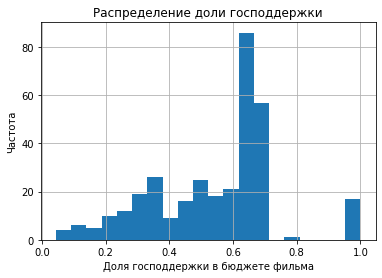

In [64]:
budget_films.support_part.hist(bins=20)
plt.xlabel('Доля господдержки в бюджете фильма')
plt.ylabel('Частота')
plt.title('Распределение доли господдержки')
plt.show()

На графике видно, что чаще всего господдержка составляет 65% всего бюджета фильма.
Также на графике видно выбросы в районе 1, это те фильмы для которых бюджет мы заполнили самостоятельно. По всей видимости так поступать не совсем корректно. Необходимо было сумму господдержки умножить на коэфициент, чтобы получить более точную сумму.

#### Выводы

На данном этапе в таблицу были добавлены новые столбцы с годом выхода фильма в прокат главным жанром и главным режисером фильма.

Также была оценена доля господдержки в бюджете фильмов. Очень редко господдержка превышает 65% доли всего бюджета. При заполнении пропущенных значений в колонке бюджет для фильмов с поддержкой я допустил неточность.

## Проведите исследовательский анализ данных


### Анализ данных прокатных сборов по годам

- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [65]:
films_in_year =filtered_data\
.pivot_table(index='year', 
             values='title', 
             aggfunc='count')\
.reset_index()\
.rename(columns={"title":"total_films"})

In [66]:
films_in_year_with_box = filtered_data[filtered_data['box_office']>0]\
.pivot_table(index='year',
             values='title',
             aggfunc='count')\
.reset_index()\
.rename(columns={"title":"films_with_info"})

In [67]:
films_in_year = films_in_year.merge(films_in_year_with_box, on='year')

In [68]:
films_in_year['box_info_part'] = (films_in_year['films_with_info'] / films_in_year['total_films'])

In [69]:
films_with_support = filtered_data[filtered_data['budget'] > 0].pivot_table(index='year',
                                                       values='title',
                                                       aggfunc='count')\
.reset_index()\
.rename(columns={'title':'title_with_support'})

In [70]:
films_in_year = films_in_year.merge(films_with_support, on='year', how='outer').fillna(0)

In [71]:
films_in_year['support_part'] = films_in_year['title_with_support'] / films_in_year['total_films']


In [72]:
films_in_year

,year,total_films,films_with_info,box_info_part,title_with_support,support_part
0,2010,757,3,0.003963,0.0,0.000000
1,2011,475,3,0.006316,0.0,0.000000
2,2012,516,3,0.005814,0.0,0.000000
3,2013,589,4,0.006791,2.0,0.003396
4,2014,729,73,0.100137,16.0,0.021948
5,2015,661,350,0.529501,86.0,0.130106
6,2016,770,424,0.550649,61.0,0.079221
7,2017,500,322,0.644000,41.0,0.082000
8,2018,876,438,0.500000,56.0,0.063927
9,2019,925,483,0.522162,70.0,0.075676


В сводной таблице видно следующее:
- Данные о суммах сборов начинают появляться с 2014 года, за более ранний период оценить сборы не получиться.
- Данные о господдержке также появляются начиная с 2014 года.

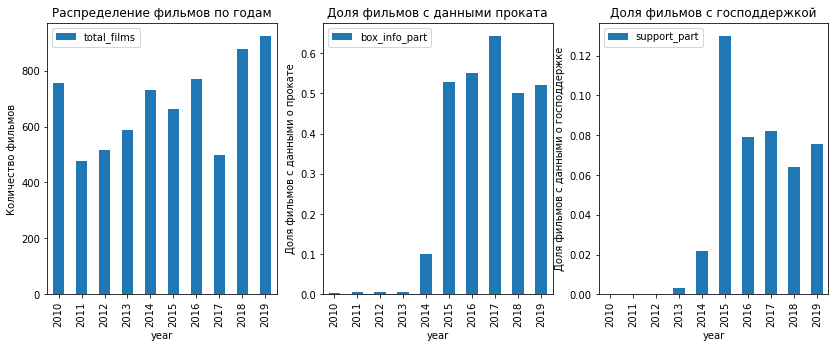

In [73]:
fig, axes = plt.subplots(1,3, figsize=(14,5))
films_in_year.plot(x='year',y='total_films',kind='bar', ax=axes[0], title='Распределение фильмов по годам')
axes[0].set_ylabel('Количество фильмов')
films_in_year.plot(x='year',y='box_info_part',kind='bar', ax=axes[1], title='Доля фильмов с данными проката')
axes[1].set_ylabel('Доля фильмов с данными о прокате')
films_in_year.plot(x='year',y='support_part',kind='bar', ax=axes[2], title='Доля фильмов с господдержкой')
axes[2].set_ylabel('Доля фильмов с данными о господдержке')
plt.show()

Для 2017 года имеется больше всего информации о кассовых сборах.

В 2015 году наибольшая доля фильмов в прокате имела господдержку.

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

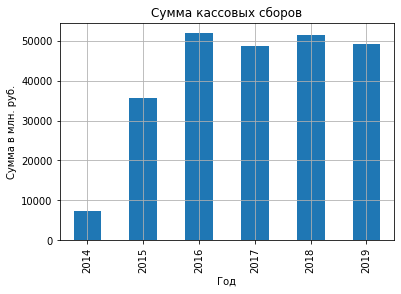

In [74]:
filtered_data[filtered_data['year'] > 2013].groupby('year')['box_office'].sum().plot(kind='bar', grid=True)
plt.title('Сумма кассовых сборов')
plt.xlabel('Год')
plt.ylabel('Сумма в млн. руб.')
plt.show()

Больше всего суммарно на прокате фильмов заработали в 2016 и 2018 году. При этом данные за последние 4 года данные отличаются не сильно. Поскольку в 2014 году данных о прокате было мало, нельзя говорить что сумма сборов в этот год существенно отличалась от сборов в последующие годы.

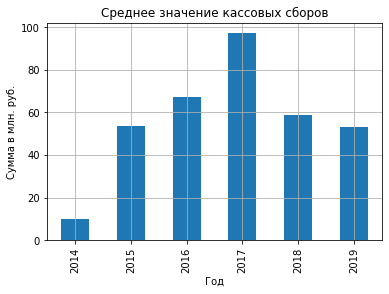

In [75]:
filtered_data[filtered_data['year'] > 2013].groupby('year')['box_office'].mean().plot(kind='bar', grid=True)
plt.title('Среднее значение кассовых сборов')
plt.xlabel('Год')
plt.ylabel('Сумма в млн. руб.')
plt.show()

В 2017 году собиралось в прокате больше всего в среднем на один фильм.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [76]:
filtered_data[filtered_data['box_office'] > 0]\
.pivot_table(index='year',
             values='box_office',
             aggfunc=['mean', 'median'])\
.T\
.style\
.format('{:.2f}')

,year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
mean,box_office,2.67,9.00,1.33,6.50,100.99,101.73,122.21,150.80,117.27,101.84
median,box_office,2.00,12.00,1.00,2.50,5.00,12.00,12.50,14.00,12.00,6.00


По сводной таблице видно, что с 2014 года медиана очень сильно отличается от среднего значения кассовых сборов. Большинство фильмов собирает мало, но есть отдельные фильмы, которые собирают очень много.

#### Выводы

Анализ данных показал следующее:
- Информация о прокате имеется для фильмов начиная с 2014 года. Для более ранних периодов информация о прокате составляет несущественную долю.
- Наибольшая доля фильмов в с господдержкой была выпущена в 2015 году.
- Общая сумма кассовых сборов в период с 2015 по 2019 год (период с наибольшим количеством наблюдений) меняется не существенно, можно предположить, что люди ходят в кино постоянно, независимо от количества и качества выпускаемых фильмов. Тоесть рынок кинопроката в целом постоянен и вопрос только в том, какой фильм сможет получить большую часть этого рынка.
- Среднее значение прокатных сборов меняется более значительно, в 2017 году зафиксировано наибольшее среднее значение сборов. Это связано с тем, что фильмов в прокат в этом году вышло меньше.
- Среднее значение и медиана прокатных сборов отличается очень сильно за все время наблюдений. Это говорит о том, что большинство фильмов собирают незначительные суммы, но имеется несколько кассовых картин, собирающих много.

### Анализ влияния возрастного ограничения на сумму сборов

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [77]:
def get_number(string):
    number = ''
    for i in range(5):
        if string[i].isdigit():
            number += string[i]
    return int(number)

In [78]:
ages = filtered_data.age_restriction.unique()

In [79]:
ages_dict = {}
for age in ages:
    ages_dict[age] = get_number(age)

In [80]:
restricted_group_sum = filtered_data[(filtered_data['box_office'] > 0) & (filtered_data['year'] > 2014)]\
.groupby('age_restriction')['box_office']\
.mean()\
.reset_index()\
.rename(columns={'box_office':'all_time_mean'})

In [81]:
restricted_group_sum['age_category'] = restricted_group_sum['age_restriction'].map(ages_dict)

In [82]:
restricted_group_count = filtered_data[(filtered_data['box_office'] > 0) & (filtered_data['year'] > 2014)]\
.groupby('age_restriction')['title']\
.count()\
.reset_index()\
.rename(columns={'title':'total_titles'})

In [83]:
restricted_group_total = filtered_data[(filtered_data['box_office'] > 0) & (filtered_data['year'] > 2014)]\
.groupby('age_restriction')['box_office']\
.sum()\
.reset_index()\
.rename(columns={'box_office':'total_box_office'})

In [84]:
filtered_data[(filtered_data['box_office'] > 0) & (filtered_data['year'] > 2014)] \
.pivot_table(index='age_restriction',
             columns='year',
             values='box_office',
             aggfunc='mean').reset_index()\
.merge(restricted_group_sum, on='age_restriction')\
.merge(restricted_group_count, on='age_restriction')\
.merge(restricted_group_total, on='age_restriction')\
.set_index('age_category')\
.sort_index()\
.style\
.format(formatter={
    2015:'{:.2f}',
    2016:"{:.2f}",
    2017:'{:.2f}',
    2018:'{:.2f}',
    2019:'{:.2f}',
    'all_time_mean':"{:.2f}"
})

,age_restriction,2015,2016,2017,2018,2019,all_time_mean,total_titles,total_box_office
age_category,,,,,,,,,
0,«0+» - для любой зрительской аудитории,9.77,9.64,76.33,10.67,9.00,12.86,64,823
6,«6+» - для детей старше 6 лет,215.69,232.81,294.73,153.11,167.00,202.17,276,55799
12,«12+» - для детей старше 12 лет,230.92,227.26,253.23,246.17,178.82,222.33,273,60695
16,«16+» - для детей старше 16 лет,89.34,115.69,165.88,124.55,81.22,113.22,687,77785
18,«18+» - запрещено для детей,37.57,60.22,72.02,53.12,61.62,57.78,717,41430


### Выводы

Возрастное ограничение влияет на кассовые сборы:

- Больше всего за все время собрали фильмы с категорией 16+, но их было значительно больше, чем фильмов с ограничением ниже.

- Самые прибыльные категории 12+ и 6+ - это категории фильмов рассчитанные на максимально широкую аудиторию.

- В среднем самая прибыльная категория 12+, но в 2017 году категория 6+ в принесла больше.

- Поскольку среднее значение очень сильно зависит от выбросов. Можно предположить, что успешность той или иной категории обусловлена тем, что в определенный год выходило много кассовых премьер.

- Низкое среднее значение для категории 18+ обусловлено тем, что фильмы таких категорий рассчитаны на узкую аудиторию. Это могли быть фестивальные картины не рассчитаные на массовый спрос и соответственно не приносящие кассовых сборов.

## Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

### Общий обзор фильмов с господдержкой

In [85]:
budget_films_info = filtered_data[filtered_data['budget'] > 0]\
.pivot_table(index='year',
             values=['budget', 'box_office','title', 'ratings'],
             aggfunc={'budget':'sum',
                      'box_office':'sum',
                      'title':'count',
                      'ratings':'mean'})\
.rename(columns={'box_office':'total_box_office',
                 'budget':'total_budget',
                 'title':'total_titles',
                 'ratings':'mean_rating'})\
.reset_index()

In [86]:
budget_types = filtered_data[filtered_data['budget'] > 0]\
.pivot_table(index='year',
             columns='type',
             values='title',
             aggfunc='count')\
.fillna(0)\
.reset_index()

In [87]:
budget_films_info = budget_films_info.merge(budget_types)

In [88]:
budget_films_info

,year,total_box_office,total_budget,mean_rating,total_titles,Анимационный,Документальный,Художественный
0,2013,20,255,6.700000,2,0.0,0.0,2.0
1,2014,1017,1301,6.006667,16,1.0,0.0,15.0
2,2015,5782,7734,6.139759,86,7.0,0.0,79.0
3,2016,6079,7552,5.677193,61,5.0,0.0,56.0
4,2017,10863,7055,6.000000,41,5.0,0.0,36.0
5,2018,9934,7001,6.001887,56,8.0,0.0,48.0
6,2019,8415,12725,6.176119,70,5.0,1.0,64.0


In [89]:
filtered_data[filtered_data['budget'] > 0]\
.pivot_table(index='age_restriction',
             values='title',
             aggfunc='count')\
.fillna(0)\
.reset_index().rename(columns={'title':'title_count'})

,age_restriction,title_count
0,«0+» - для любой зрительской аудитории,8
1,«12+» - для детей старше 12 лет,106
2,«16+» - для детей старше 16 лет,125
3,«18+» - запрещено для детей,28
4,«6+» - для детей старше 6 лет,65


In [90]:
mean_gos_rating = filtered_data[filtered_data['budget'] > 0]['ratings'].mean()
mean_total_rating = filtered_data['ratings'].mean()
mean_russian_rating = filtered_data[filtered_data['production_country'].str.contains('Россия')]['ratings'].mean()
print(f'Средний рейтинг всех фильмов: {mean_total_rating:.2f}')
print(f'Средний рейтинг всех российских фильмов: {mean_russian_rating:.2f}')
print(f'Средний рейтинг фильмов с господдержкой: {mean_gos_rating:.2f}')

Средний рейтинг всех фильмов: 6.47
Средний рейтинг всех российских фильмов: 6.16
Средний рейтинг фильмов с господдержкой: 6.02


#### Выводы
В сводной таблице видно следующее:
- Самый продуктивный год 2015 - было выпущено больше всего фильмов с господдержкой, так же в этот год рейтинг фильмов был чуть выше среднего
- Самый низкий средний рейтинг был зафиксирован в 2015 году.
- Чаже всего поддержку получают художественные фильмы.
- Документальные фильмы практически не получают господдержки.
- В среднем рейтинг фильмов с господдержкой ниже рейтинга фильмов по всей выборке
- Фильмы с господдержкой нацелены на широкую аудиторию, основные категории от 12 лет (молодое поколение).

### Оценка коммерческой успешности фильмов с господдержкой

In [91]:
total_gos_box_office = filtered_data[filtered_data['budget'] > 0]['box_office'].sum()
total_gos_budget = filtered_data[filtered_data['budget'] > 0]['budget'].sum()
print(f'Всего собрали фильмы с господдержкой: {total_gos_box_office:.2f}')
print(f'Всего бюджет фильмов с господдержкой: {total_gos_budget:.2f}')

Всего собрали фильмы с господдержкой: 42110.00
Всего бюджет фильмов с господдержкой: 43623.00


In [92]:
total_gos_box_office = filtered_data[(filtered_data['budget'] > 0) 
                                     & (filtered_data['nonrefundable_support'] != 0)
                                    & (filtered_data['refundable_support'] == 0)]['box_office'].sum()

total_gos_budget = filtered_data[(filtered_data['budget'] > 0) 
                                 & (filtered_data['nonrefundable_support'] != 0)
                                & (filtered_data['refundable_support'] == 0)]['budget'].sum()
print(f'Всего собрали фильмы только с невозвратной поддержкой: {total_gos_box_office:.2f}')
print(f'Всего бюджет фильмов только с невозвратной поддержкой: {total_gos_budget:.2f}')

Всего собрали фильмы только с невозвратной поддержкой: 16419.00
Всего бюджет фильмов только с невозвратной поддержкой: 20935.00


In [93]:
total_gos_box_office = filtered_data[(filtered_data['budget'] > 0) 
                                     & (filtered_data['refundable_support'] != 0)
                                    & (filtered_data['nonrefundable_support'] == 0)]['box_office'].sum()

total_gos_budget = filtered_data[(filtered_data['budget'] > 0) 
                                 & (filtered_data['refundable_support'] != 0)
                                & (filtered_data['nonrefundable_support'] == 0)]['budget'].sum()
print(f'Всего собрали фильмы только с возвратной поддержкой: {total_gos_box_office:.2f}')
print(f'Всего бюджет фильмов только с возвратной поджеркой: {total_gos_budget:.2f}')

Всего собрали фильмы только с возвратной поддержкой: 2392.00
Всего бюджет фильмов только с возвратной поджеркой: 1326.00


In [94]:
success_films_total =  filtered_data[(filtered_data['budget'] > 0)
              & (filtered_data['box_office'] > filtered_data['budget'])]['title'].count()
total_gos_films = filtered_data[(filtered_data['budget'] > 0)]['title'].count()
success_part = success_films_total / total_gos_films
print(f'Из {total_gos_films} фильмов имели коммерческий успех {success_films_total}, что составляет {success_part:.2%}')

Из 332 фильмов имели коммерческий успех 78, что составляет 23.49%


#### Графики количества фильмов, бюджетов и сборов по годам

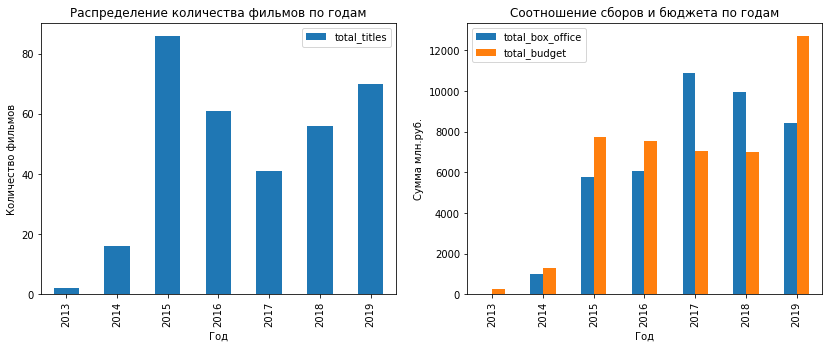

In [95]:
fig, axes = plt.subplots(1,2, figsize=(14,5))
budget_films_info.plot(x='year',y='total_titles',kind='bar', ax=axes[0], title='Распределение количества фильмов по годам')
axes[0].set_ylabel('Количество фильмов')
axes[0].set_xlabel('Год')
budget_films_info.plot(x='year',y=['total_box_office', 'total_budget'],kind='bar', ax=axes[1], title='Соотношение сборов и бюджета по годам')
axes[1].set_ylabel('Сумма млн.руб.')
axes[1].set_xlabel('Год')
plt.show()


#### Выводы
- В общем фильмы с господдержкой не имели коммерческого успеха их бюджет превышает сборы.

- При этом фильмы, которые получали только возвратную поддержку заработали больше, чем потратили.

- Можно сделать предположение о том, что когда ставиться цель заработать денег, то поддержка направляется на успешные фильмы.

- В тоже время вероятно невозвратная поддержка направляется на развитие кино в целом и на просветительские цели, возможно изначально предполагается, что такие фильмы денег не заработают.

- 23 процента фильмов с поддержкой имели коммерческий успех.

###  Анализ доли рынка фильмов с государственной поддержкой

In [96]:
box_office_info = filtered_data.pivot_table(index='year',
                          values=['title','box_office'],
                          aggfunc={'title':'count', 'box_office':'sum'})\
.rename(columns={'box_office':'total_box_office', 'title':'total_titles'})\
.join(
filtered_data[filtered_data['budget'] > 0 ].pivot_table(index='year',
                                                        values=['title','box_office'],
                                                          aggfunc={'title':'count', 'box_office':'sum'})\
.rename(columns={'box_office':'gos_box_office', 'title':'gos_titles'})).fillna(0)

In [97]:
box_office_info['gos_office_part'] = box_office_info['gos_box_office'] / box_office_info['total_box_office']
box_office_info['gos_titles_part'] = box_office_info['gos_titles'] / box_office_info['total_titles']
box_office_info

,total_box_office,total_titles,gos_box_office,gos_titles,gos_office_part,gos_titles_part
year,,,,,,
2010,8,757,0.0,0.0,0.000000,0.000000
2011,27,475,0.0,0.0,0.000000,0.000000
2012,4,516,0.0,0.0,0.000000,0.000000
2013,26,589,20.0,2.0,0.769231,0.003396
2014,7372,729,1017.0,16.0,0.137954,0.021948
2015,35605,661,5782.0,86.0,0.162393,0.130106
2016,51815,770,6079.0,61.0,0.117321,0.079221
2017,48559,500,10863.0,41.0,0.223707,0.082000
2018,51364,876,9934.0,56.0,0.193404,0.063927


#### Выводы

В сводной таблице видно следующее:
- Фильмы с государствнной поддержкой занимают существенную долю рынка кинопроката несмотря на невысокую долю таких фильмов в общем количестве фильмов в прокате
- В 2017 году эта доля превышала 20%, по всей видимости фильмы с государственной поддеркжой посмотрело большое количество зрителей.

### Анализ рейтинга и жанров фильмов с господдержкой

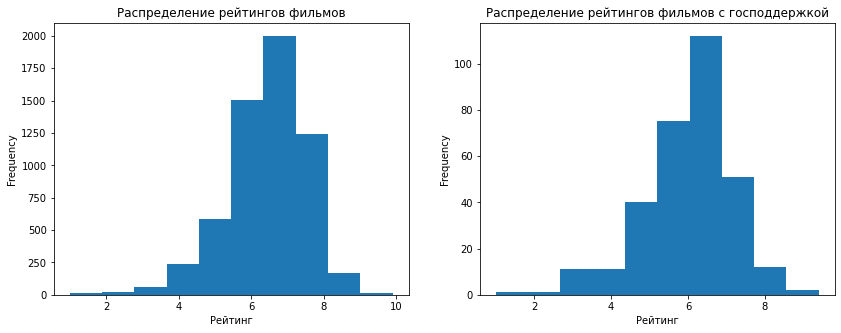

In [98]:
fig, axes = plt.subplots(1,2, figsize=(14,5))
filtered_data['ratings'].plot(kind='hist',ax=axes[0], title='Распределение рейтингов фильмов')
axes[0].set_xlabel('Рейтинг')
filtered_data[filtered_data['budget'] > 0]['ratings'].plot(kind='hist',ax=axes[1], title='Распределение рейтингов фильмов с господдержкой')
axes[1].set_xlabel('Рейтинг')
plt.show()

Распределение рейтингов фильмов с господдержкой практически совпадает с распределением рейтингов фильмов по всей выборке.

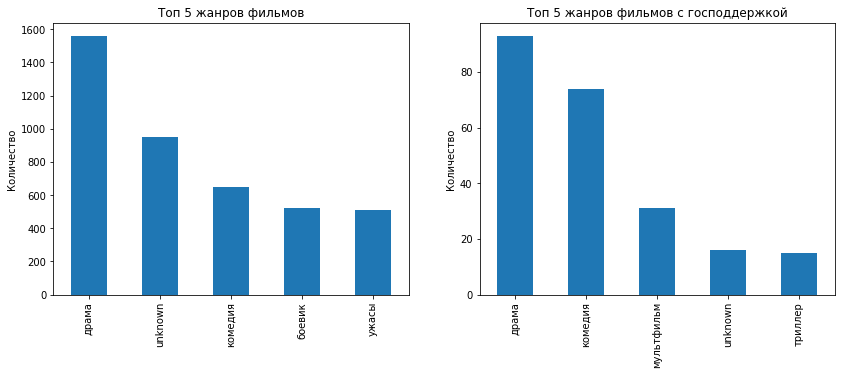

In [99]:
fig, axes = plt.subplots(1,2, figsize=(14,5))
filtered_data['main_genre'].value_counts().head().plot(kind='bar',ax=axes[0], title='Топ 5 жанров фильмов')

axes[0].set_ylabel('Количество')

filtered_data[filtered_data['budget'] > 0]['main_genre']\
.value_counts().head()\
.plot(kind='bar',ax=axes[1], title='Топ 5 жанров фильмов с господдержкой')
axes[1].set_ylabel('Количество')

plt.show()


На графика видно, что в топ 5 жанров с господдержкой входят мультипликационные фильмы, которые не попадают в топ 5 по всей выборке.

Вероятно государственная политика направлена на воспитание молодежи, а мультфильм это хороший способ донести информацию до юной аудитории.

Также на графике видно, что господдержку реже получают боевики. Видимо воспитательной составляющей в фильмах такого жанра мало.

In [100]:
gos_support_film_part = filtered_data[filtered_data['budget'] > 0]['production_country'].count() / filtered_data[filtered_data['production_country'].str.contains('Россия')]['production_country'].count()
print(f'Поддержку получает {gos_support_film_part:.2%} фильмов выпускаемых в России')

Поддержку получает 16.99% фильмов выпускаемых в России


In [101]:
filtered_data[filtered_data['budget'] > 0]['main_director'].value_counts().head(10)

Р.Давлетьяров    5
С.Андреасян      4
Д.Дьяченко       4
А.Аксененко      3
Н.Хомерики       3
К.Шипенко        3
С.Мокрицкий      3
А.Цицилин        3
Д.Шмидт          3
А.Котт           3
Name: main_director, dtype: int64

#### Выводы

- Рейтинги фильмов с господдержкой распределены также как и рейтинги всех фильмов по выборке. Хотя в среднем рейтинг фильмов с поддержкой несколько ниже, чем остальных фильмов

- Поддержку получают самые популярные жанры драма и комедия. Также поддержку получают мультипликационные фильмы.

- Из всех фильмов выпущенных в России господдержку получали 17% фильмов.

- Некоторые режисеры получали поддержку на свои фильмы несколько раз. Больше всего раз получал поддержку Ренат Давльетьяров (5 раз)

###  Выводы по разделу

- Рейтинг фильмов с государственной поддержкой немного ниже, чем средний рейтинг фильмов по всей выборке и средний рейтинг всех российских фильмов.

- В целом фильмы с поддержкой не имеют коммерческого успеха, хотя фильмы, получающие только возвратную поддержку окупаются.

- Фильмы с поддержкой имеют свою долю на рынке кинопроката и эта доля достаточно существенна, это говорит о том, что несмотря на то, что фильмы не окупаются их смотрит довольно большая аудитория.

- По распределению жанров и возрастных ограничений видно, что вероятно цель господдеркжи это воспитательная и просветительская деятельность.

- В целом можно сделать вывод, что господдержка фильмов имеет смысл. Такие фильмы получают свою долю аудитории, через которую государство продвигает свою политику, несмотря на то, что не всегда такие фильмы имеют коммерческий успех.


## Напишите общий вывод

В ходе исследования установлено следующее:

1. Рынок кинопроката за период с 2015 по 2019 год изменяется не сильно. По всей видимости люди ходят в кино регулярно не зависимо от того какие фильмы идут в прокате. Соответственно можно получить только часть этого рынка.
2. Рейтинг фильмов снятых в России немного ниже рейтинга фильмов по всей выборке, а фильмов с господдержкой еще немного ниже, чем общероссийский.
3. Коммерческого успеха картины с господдержкой в общем не добиваются, хотя для картин, которым выделялась возвратная поддержка характерна иная картина. Можно сделать вывод, что в том случае, когда поддержка рассматривается как инвестиция она окупается. В других случаях вероятно поддержка имеет другую мотивацию, скорее просветительскую и воспитательную. И этой цели фильмы добиваются. Несмотря на достаточно небольшое количество фильмов с поддержкой они занимают существенную долю рынка кинопроката.

Из всего вышеперечисленного можно сделать вывод, что фильмы с поддержкой востребованы, их смотрят, хотя их рейтинг немного ниже, чем рейтинг других фильмов.

Практику государственной поддержки кинематографа имеет смысл продолжать.